**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

In [24]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

# Preparando os dados

## Tarefa #1: Recebendo os dados

Para receber os dados podemos fazer o upload do mesmo no Google Drive:

In [25]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

data_google_id = '1riLdRmKYFVEklLE3NhB76W1QhSoLRh6a'
gdd(file_id=data_google_id,
    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True,
    overwrite = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

0.0 B Done.


In [26]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Temos 6 colunas distintas nesse dataset:

*   sex: sexo da pessoa *(0: masculino; 1: feminino);*
*   bmi: Indice de massa corporal *(valor contínuo)*
*   children: Número de filhos *(valor discreto)*
*   smoker: Fumante *(0: não fuma; 1: fumante)*
*   region: Diferentes regiões onde a pessoa mora (categorizado em 0; 1; 2; 3)
*   charges: Valor do seguro de vida *(valor contínuo)*

## Tarefa #2: Analise Exploratória dos Dados

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


Desse conjunto de dados podemos ver que o mesmo possui váriaveis do tipo int e float. Logo não há a necessidade do uso de *One Hot Encoding* ou *Label Encoding*


In [28]:
# The info() output shows no null values, so filling is not needed for this dataset.
# If there were null values, you could fill them like this:
# dados['bmi'].fillna(dados['bmi'].mean(), inplace=True)

O valor acima nos informa o tamanho dos nossos dados. Ele possui 348 linhas por 6 colunas. Assim temos 348 exemplos de dados relacionados aos atributos sex, bmi, children, smoker, region e charges.

Vamos checar se o nosso conjunto de dados possui algum valor nulo:

Podemos ver acima que nenhum dos valores obtidos eram nulos!

In [29]:
dados.describe()


,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


Podemos ver acima dados como a média (mean), desvio padrão (std), valor mínimo (min), valor máximo (max) e os percentuais de 25, 50 e 75% dos dados.

O percentual nos indica a quantidade de exemplos que estão até um dado valor. Por exemplo 25% das pessoas estão com o bmi em 26,78 ou menos.

Dessa forma, podemos ter uma ideia da distribuição de cada um dos atributos.

Além disso, quando comparamos as colunas de *sex*, *children*, *smoker* e *region* com as colunas de *age* e *bmi* notamos uma diferença significativa na ordem de grandeza dessas colunas. Assim, temos que tratar esse problema com a normalização ou padronização dos dados antes do treinamento do mesmo.

Vamos analisar o histograma dos atributos para checar se iremos normalizar ou padronizar os dados.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

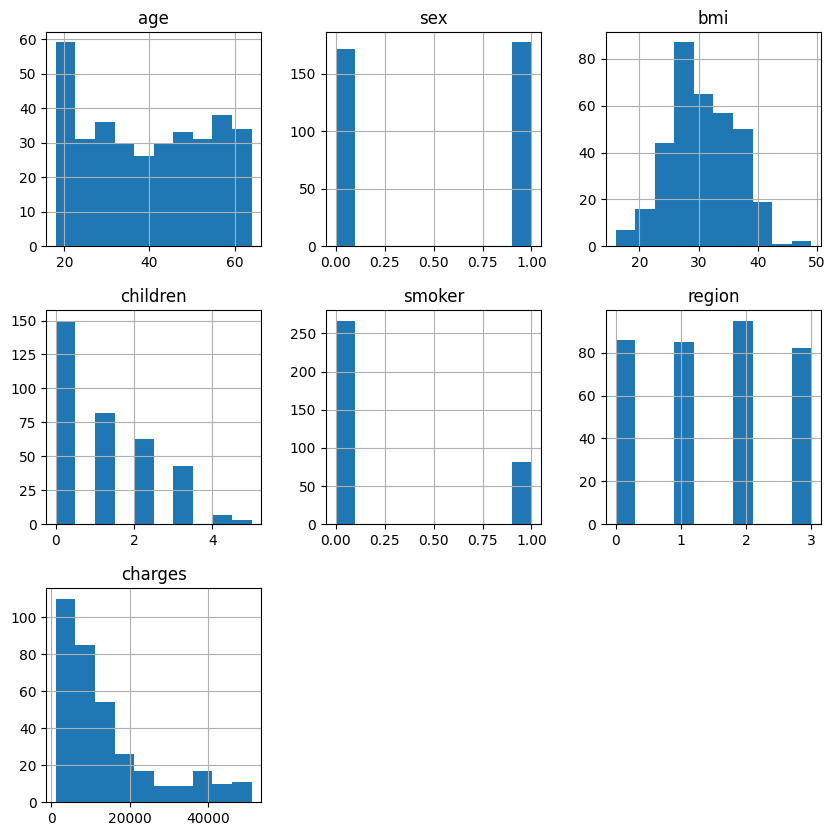

In [30]:
dados.hist(figsize=(10,10))


Como a coluna *age* não segue uma distribuição normal, iremos normalizar e não padronizar nossos dados!

# Aplicando IA aos nossos dados

No aprendizado supervisionado temos os dados de entrada do nosso modelo $\mathbf{x}_{i}$ e também conhecemos os labels deles $\mathbf{y}_{i}$, isto é o valor esperado da saída do modelo para cada entrada

Nos dados acima o índice $i$ é utilizado para diferenciar cada uma das diferentes pessoas das quais foram levantados os dados acima. **Quais deles poderiam ser nossas entradas e nossas saídas?**

**A resposta para isso depende para cada caso!** Para uma empresa que vende seguros, o ideal é ter um modelo que dado os seguintes atributos: **[sex, bmi, children, smoker, region]** eles possam calcular o valor que será cobrado do seguro para essa pessoa **[charges]**

A imagem a seguir ilustra esse exemplo de divisão de entradas e saídas.


<center>
<img src="https://drive.google.com/uc?export=view&id=1Yvziu9GlD5W-j-Zr1EJ3LAgY_yxbViYU" width="500">

Assim podemos criar um modelo que será treinado para fazer predições do valor de saída ($\hat{\mathbf{y}}_{i}$). O esquema para esse tipo de aprendizado supervisionado pode ser vizualizado a seguir:

<center>
<img src="https://drive.google.com/uc?export=view&id=1hFdoJXTk2jTR3zupjjqlr0dOKuaeOZCE" width="500">


A ideia acima parece muito interessante para criação de diversos modelos e pode ser utilizada em diferentes aplicações.

Entretanto, seria interessante ter uma ideia do quão bom é o nosso modelo, isto é, será que o modelo que criamos tem uma boa capacidade para estimar a sua saída ($\hat{\mathbf{y}}_{i}$) para novos dados?

O que estamos perguntando acima é a verificação da capacidade de generalização do nosso modelo, isto é, a capacidade do modelo de conseguir boas estimativas de saídas para novos dados.

## Divisão dos conjuntos de dados

Pensando na pergunta acima, existem duas possibilidades de soluções:



*   Poderíamos treinar um modelo com todos os nossos dados e vender o resultado disso para um empresa. A empresa posteriormente diria se o modelo está tendo um bom desempenho ou não. **Cenário ruim: Caso o modelo não esteja com um bom desempenho iriamos prejudicar o nome da empresa**
*   Poderíamos dividir os nossos dados em conjunto de treinamento e conjunto de teste. Dessa forma, treinariamos o modelo com o primeiro conjunto e poderíamos utilizar alguma métrica para avaliar o nosso modelo no segundo conjunto de dados. **Assim, teremos uma ideia do desempenho do nosso modelo antes de enviar ao cliente!**



Na imagem a seguir podemos ver o procedimento para trabalhar com o aprendizado supervisionado com a divisão dos dados em conjunto de treinamento ($\mathbf{X}_{train}$ e $\mathbf{y}_{train}$) e no conjunto de teste ($\mathbf{X}_{test}$ e $\mathbf{y}_{test}$)

<center>
<img src="https://drive.google.com/uc?export=view&id=1k3nIve0eo-zOjA48YouMHoKJOFfiabS6" width="600">




Dessa forma os nossos dados que possuem a dimensão de 348 exemplos com 6 colunas devem ser divididos em dois conjuntos para podermos trabalhar com o seu aprendizado supervisionado

## Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [31]:
#dividindo os dados em entrada(x) e saida (y)
X = dados.drop('charges', axis=1)
y = dados['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando a escala
scaler = StandardScaler()
scaler.fit(X_train[['age','bmi']])
X_train[['age','bmi']] = scaler.transform(X_train[['age','bmi']])
X_test[['age','bmi']] = scaler.transform(X_test[['age','bmi']])

No código acima pegamos os nossos dados e dividimos eles em conjunto de treinamento e teste, tendo os dados de entrada $\mathbf{X}$ e os dados de saída  $\mathbf{y}$

## Tarefa #2: Treinando os modelos

### Regressão Linear exemplo Valores do Seguro de Vida

Agora que entendemos o conceito da Regressão Linear vamos aplicar ela ao caso do seguro de vida. Vamos treinar o modelo utilizando o conjunto de dados de treinamento:

In [32]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

### Árvores de Decisão para regressão:

In [33]:
modelo = DecisionTreeRegressor(max_depth=3)
modelo.fit(X_train, y_train)
y_pred_49AD = modelo.predict(X_test)

### Random Forest para regressão:

In [34]:
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)
y_pred_RF = modelo.predict(X_test)

### Gradient Boosting Regressor:

In [35]:
modelo = GradientBoostingRegressor(min_samples_leaf=5, n_estimators=50)
modelo.fit(X_train, y_train)
y_pred_GBR = modelo.predict(X_test)

# Automatizar o treino

In [36]:
modelos = {'Regressão Linear' : LinearRegression(),
           'Árvore de decião' : DecisionTreeRegressor(max_depth=3),
           'Floresta Aleatória' : RandomForestRegressor(),
           'GBR' : GradientBoostingRegressor(min_samples_leaf=5, n_estimators=50)}

y_pred = {}
for nome,modelo in modelos.items():
  modelo.fit(X_train, y_train)
  y_pred[nome] = modelo.predict(X_test)

In [37]:
tabela = pd.DataFrame(y_pred)
tabela['y_test'] = y_test
tabela.head()


,Regressão Linear,Árvore de decião,Floresta Aleatória,GBR,y_test
0,12178.034844,19405.154477,21594.249517,18936.275105,NaN
1,13856.730174,19405.154477,18201.057601,15946.557476,NaN
2,27499.615219,39940.629858,39361.033794,37211.710793,NaN
3,9165.358496,6995.820116,8033.821426,9487.347378,21984.47061
4,8660.104431,6995.820116,6242.608978,7229.462834,NaN


In [38]:
metricas = tabela[['Regressão Linear', 'y_test']].copy()
metricas ['erro'] = metricas['Regressão Linear'] - metricas['y_test']
metricas.head()

,Regressão Linear,y_test,erro
0,12178.034844,NaN,NaN
1,13856.730174,NaN,NaN
2,27499.615219,NaN,NaN
3,9165.358496,21984.47061,-12819.112114
4,8660.104431,NaN,NaN


In [39]:
metricas['erro quad'] = metricas['erro']**2
metricas.head()

,Regressão Linear,y_test,erro,erro quad
0,12178.034844,NaN,NaN,NaN
1,13856.730174,NaN,NaN,NaN
2,27499.615219,NaN,NaN,NaN
3,9165.358496,21984.47061,-12819.112114,1.643296e+08
4,8660.104431,NaN,NaN,NaN


In [47]:
metricas['erro abs'] = abs(metricas['erro'])
metricas['erro abs'].mean()

np.float64(11842.250374813048)

###Tarefa #3: Métricas de desempenho dos modelos


#### Mean Squared Error (MSE)

Mean squared error (MSE):
Em português, erro quadrático médio, essa métrica penaliza mais erros maiores, já que os erros (diferença entre o valor previsto e o correto) são elevados ao quadrado. Podemos ter dificuldade em interpretar no contexto real o que o erro obtido significa.

$MSE = \frac{1}{m}\sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^{2}$

In [48]:
mean_squared_error(y_pred=y_pred['Regressão Linear'], y_true=y_test)

37726891.07038928

#### Mean absolute error (MAE):
Em português, erro absoluto médio, essa métrica basicamente faz a média do erro absoluto de cada previsão. Facilita a interpretação no modelo real, mas temos sempre que ter em mente que erros maiores (outliers) podem atrapalhar muito a ideia obtida pela média:

$MAE = \frac{1}{m}\sum^{m}_{i=1}|\hat{y}^{(i)}-y^{(i)}|$

In [49]:
mean_absolute_error(y_pred=y_pred['Regressão Linear'], y_true=y_test)

4275.854668717769

#### R<sup>2</sup>:
O erro "R quadrado" é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo "naive", que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

$R^{2} = 1- \frac{1}{m}\frac{\sum^{m}_{i=1}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum^{m}_{i=1}(y^{(i)}-\bar{y}^{(i)})^{2}}$

#### Métricas para todos os modelos

Vamos agora obter todas as métricas dos modelos treinados para comparação:

Podemos observar que o melhor modelo (menor MAE e MSE e maior R2 score) é o Gradient Boosting Regressor

# Exercício

Vamos analisar um conjunto de dados de jogadores de Counter Striker e aplicar um modelo de regressão linear desses dados. O conjunto de dados é carregado a seguir:

In [40]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

data_google_id = '1tLbBqTphKeaYTSvj_vKQS759qtrw51Vk'
gdd(file_id=data_google_id,
    dest_path = './cs_data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True,
    overwrite=True)

# Armazenandos os dados em um DataFrame
cs_data = pd.read_csv("cs_data.csv", index_col=0 )

672.0 KiB Done.


Responder os itens solicitados na sequencia:

a) Fazer a análise dos dados

In [41]:
# seu código aqui
cs_data.head()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
Player Name,,,,,,,
DNB,45,38,4,20,8,42,90
link1n,31,22,3,17,5,54,51
sn0w,42,14,4,20,0,40,42
reedkihaddi,90,13,3,23,0,28,33
pEhnol,33,11,4,27,0,54,26


b) Fazer a análise estatística dos dados

In [42]:
# seu código aqui

c) Fazer a divisão dos dados em conjunto de treinamento e teste, sendo o Score o valor que desejamos como saída do modelo

Obs.: Para o conjunto de dados de entrada, excluir TAMBÉM a coluna Player id. (Essa coluna é apenas o nome dos jogadores e não possui nenhuma informação)

In [43]:
# seu código aqui

d) Para os dados que foram divididos anteriormente, realizar o seu treinamento com um modelo de Regressão Linear

In [44]:
# seu código aqui

e) Fazer a previsão para o conjunto dos dados de teste

In [45]:
# seu código aqui

f) Calcular as métricas de desempenho

# Referencia Bibliográfica:



GÉRON, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Sebastopol: O’reilly Media, 2017